##**Processing Data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("PPR-ALL.csv", encoding="unicode_escape")

df['Price ()'] = df['Price ()'].str.replace('', '', regex=False)

df['Price ()'] = pd.to_numeric(df['Price ()'].str.replace(',', '', regex=False), errors='coerce')

df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y')

df = df.rename(columns={'Price ()':'Price in K','Date of Sale (dd/mm/yyyy)':'Date of Sale'})

df['Price in K'] = df['Price in K']/1000

df['Price in K'] = df['Price in K'].astype(int)

# Assuming your date column is named 'Date of Sale'
# Ensure the column is in datetime format
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])

# Function to determine the season
def get_season(date):
    month = date.month
    day = date.day
    
    if (month == 3 and day >= 1) or (month in [4, 5]) or (month == 6 and day <= 30):
        return 'Spring'
    elif (month == 6 and day >= 1) or (month in [7, 8]) or (month == 9 and day <= 30):
        return 'Summer'
    elif (month == 9 and day >= 1) or (month in [10, 11]) or (month == 12 and day <= 31):
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new column with the season
df['Season'] = df['Date of Sale'].apply(get_season)

df['Year'] = df['Date of Sale'].dt.year
df['Month'] = df['Date of Sale'].dt.month



C:\Users\edson\AppData\Local\Temp\ipykernel_14088\715285702.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PPR-ALL.csv", encoding="unicode_escape")


In [4]:
df.head()

,Date of Sale,Address,County,Eircode,Price in K,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Season,Year,Month
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Winter,2010,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,400,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1


###**Checking null values**

In [5]:
df.shape

(690485, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690485 entries, 0 to 690484
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               690485 non-null  datetime64[ns]
 1   Address                    690485 non-null  object        
 2   County                     690485 non-null  object        
 3   Eircode                    163192 non-null  object        
 4   Price in K                 690485 non-null  int64         
 5   Not Full Market Price      690485 non-null  object        
 6   VAT Exclusive              690485 non-null  object        
 7   Description of Property    690485 non-null  object        
 8   Property Size Description  52829 non-null   object        
 9   Season                     690485 non-null  object        
 10  Year                       690485 non-null  int32         
 11  Month                      690485 non-null  int32   

In [7]:
df.isnull().sum()

Date of Sale                      0
Address                           0
County                            0
Eircode                      527293
Price in K                        0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    637656
Season                            0
Year                              0
Month                             0
dtype: int64

>Você pode encontrar informações detalhadas sobre o método *interpolate()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

###**Checking Duplicated Values**

In [8]:
df.duplicated().sum()

np.int64(929)

In [9]:
# Checking Duplciated Lines
duplicatas = df.duplicated(keep=False)

# Getting duplicated lines
linhas_duplicadas = df[duplicatas]

# Sorting By Date
linhas_duplicadas.sort_values(by='Date of Sale')

,Date of Sale,Address,County,Eircode,Price in K,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Season,Year,Month
103,2010-01-06,"Curragraigue, Blennerville, Tralee",Kerry,NaN,265,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
104,2010-01-06,"Curragraigue, Blennerville, Tralee",Kerry,NaN,265,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
175,2010-01-08,"58 Castlewood Park, Little Island",Cork,NaN,250,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
176,2010-01-08,"58 Castlewood Park, Little Island",Cork,NaN,250,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
471,2010-01-15,"Old Road, Monasterboice",Louth,NaN,324,No,No,Second-Hand Dwelling house /Apartment,NaN,Winter,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
682989,2024-09-11,"5 MARINA VIEW, CLARENCE ST, DUN LAOGHAIRE",Dublin,A96YA07,580,No,No,Second-Hand Dwelling house /Apartment,NaN,Summer,2024,9
684892,2024-09-23,"57 BANNOW RD, CABRA, DUBLIN 7",Dublin,D07K6P6,375,No,No,Second-Hand Dwelling house /Apartment,NaN,Summer,2024,9
684893,2024-09-23,"57 BANNOW RD, CABRA, DUBLIN 7",Dublin,D07K6P6,375,No,No,Second-Hand Dwelling house /Apartment,NaN,Summer,2024,9
689455,2024-10-22,"19 Tully Drive, Cherrywood",Dublin,NaN,436,No,Yes,New Dwelling house /Apartment,NaN,Autumn,2024,10


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(689556, 12)

##**Checking Numeric Data**

###**Descriptive Data**

In [12]:
df.describe()

,Date of Sale,Price in K,Year,Month
count,689556,689556.000000,689556.000000,689556.000000
mean,2018-09-11 17:18:39.600438528,296.798610,2018.152994,7.027785
min,2010-01-01 00:00:00,5.000000,2010.000000,1.000000
25%,2015-09-25 00:00:00,135.000000,2015.000000,4.000000
50%,2018-12-11 00:00:00,226.000000,2018.000000,7.000000
75%,2021-12-22 00:00:00,340.000000,2021.000000,10.000000
max,2024-11-01 00:00:00,225000.000000,2024.000000,12.000000
std,NaN,1021.026588,3.868527,3.426432


###**Checking the Distribution**


> * [Seaborn: Statistical Data Visualization](https://seaborn.pydata.org/)
> * [Matplotlib: Visualization with Python](https://matplotlib.org/)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

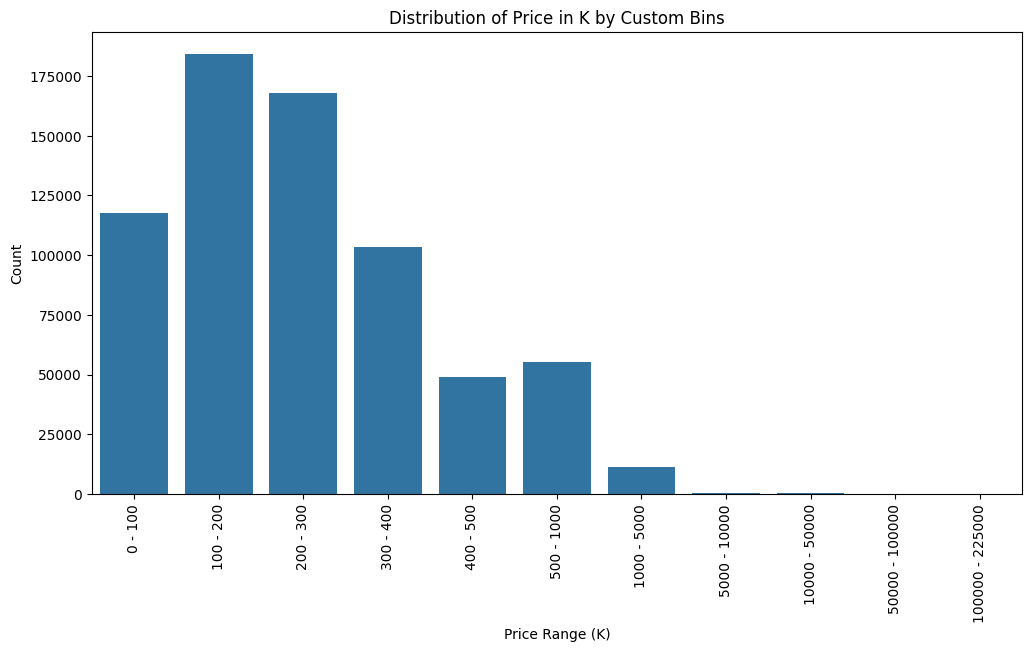

In [14]:
# Define custom bins based on the observed distribution
bins = [0, 100, 200, 300, 400, 500, 1000, 5000, 10000, 50000, 100000, 225000]  # Adjust as necessary
bin_labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

# Bin the data and count occurrences
df['Price Bin'] = pd.cut(df['Price in K'], bins=bins, labels=bin_labels, include_lowest=True)
bin_counts = df['Price Bin'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel('Price Range (K)')
plt.ylabel('Count')
plt.title('Distribution of Price in K by Custom Bins')
plt.show()

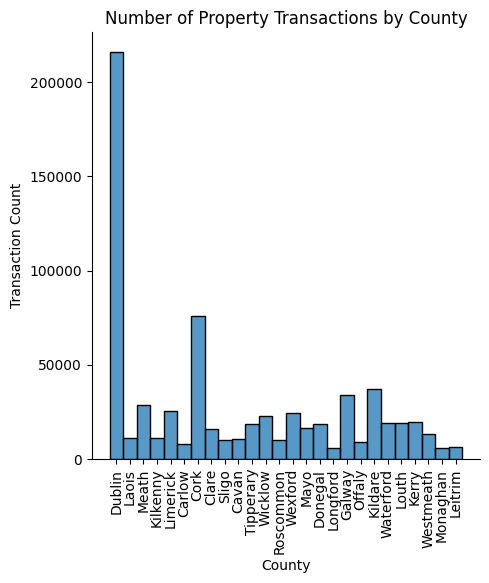

In [15]:
sns.displot(df, x='County')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title('Number of Property Transactions by County')
plt.xlabel('County')
plt.ylabel('Transaction Count')
plt.show()

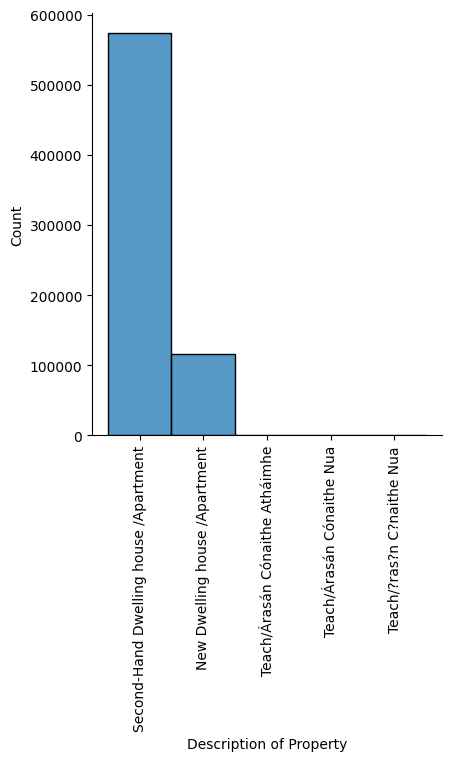

In [16]:
sns.displot(df, x='Description of Property', bins=10)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

## **Exploring Categorical Data**

### **Obtaining Descriptive Statistics**

In [17]:
df.describe(include=[object])

,Address,County,Eircode,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Season
count,689556,689556,163068,689556,689556,689556,52589,689556
unique,618818,26,158077,2,2,5,6,4
top,"KILLARNEY RD, ABBEYFEALE, LIMERICK",Dublin,D24W9NN,No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Spring
freq,15,215917,34,655045,575451,573266,37894,212087


In [18]:

for col in ['County', 'Not Full Market Price', 'Description of Property', 'Property Size Description']:
  print(f'Coluna: {col}')
  print(df[col].unique())
  print('='*15, '\n')

Coluna: County
['Dublin' 'Laois' 'Meath' 'Kilkenny' 'Limerick' 'Carlow' 'Cork' 'Clare'
 'Sligo' 'Cavan' 'Tipperary' 'Wicklow' 'Roscommon' 'Wexford' 'Mayo'
 'Donegal' 'Longford' 'Galway' 'Offaly' 'Kildare' 'Waterford' 'Louth'
 'Kerry' 'Westmeath' 'Monaghan' 'Leitrim']

Coluna: Not Full Market Price
['No' 'Yes']

Coluna: Description of Property
['Second-Hand Dwelling house /Apartment' 'New Dwelling house /Apartment'
 'Teach/Árasán Cónaithe Atháimhe' 'Teach/Árasán Cónaithe Nua'
 'Teach/?ras?n C?naithe Nua']

Coluna: Property Size Description
[nan 'greater than or equal to 38 sq metres and less than 125 sq metres'
 'greater than 125 sq metres' 'less than 38 sq metres'
 'greater than or equal to 125 sq metres'
 'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach'
 'n?os l? n? 38 m?adar cearnach']



###**Comparing Registered Price Of Properties By County

Here’s a simple explanation you can add to your chart or use in a legend to help explain the log-transformed data:

> **Explanation**: "The prices shown on this chart are log-transformed to better visualize the wide range of property values. A log transformation compresses the scale, making high values less dominant and revealing patterns in the data's core range. To interpret, a value of `3` on the y-axis represents a price of `1,000` (10^3), `4` represents `10,000` (10^4), and `5` represents `100,000` (10^5). This approach provides a clearer view of the distribution, especially when data spans several orders of magnitude."


**

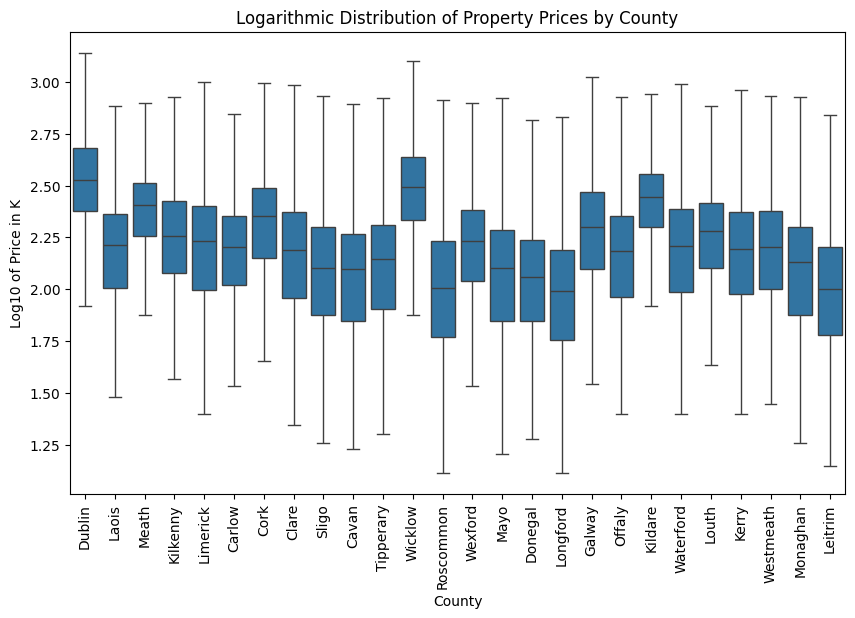

In [19]:
# Create a new column with log-transformed prices
df['Log Price in K'] = np.log10(df['Price in K'])

# Plot the log-transformed prices in a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='County', y='Log Price in K', data=df, showfliers=False)

# Add titles and labels
plt.title('Logarithmic Distribution of Property Prices by County')
plt.xlabel('County')
plt.ylabel('Log10 of Price in K')

plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

###** Please inform the log number from the chart above to see the real number converted**

In [20]:
def convert_log_to_original(log_value):
    original_value = int(10 ** log_value)
    return original_value


log_value = 2.5

# Convert and display the original value
original_value = convert_log_to_original(log_value)
print(f"The original value corresponding to log {log_value} is: {original_value}K")

The original value corresponding to log 2.5 is: 316K


In [21]:
## Teste the hypothesis that Dublin and Wicklow have equal houses prices
from scipy.stats import mannwhitneyu

# Filtrando os dados da primavera e outono
dublin = df[df['County'] =='Dublin']['Price in K']
wicklow = df[df['County'] =='Wicklow']['Price in K']

# Aplicando o teste de Mann-Whitney
u_statistic, p_value = mannwhitneyu(dublin,wicklow,alternative='greater')
u_statistic, p_value

(np.float64(2725021584.5), np.float64(5.072218371204788e-143))

In [22]:
dublin_mean = df[df['County'] =='Dublin']['Price in K'].mean()
wicklow_mean = df[df['County'] =='Wicklow']['Price in K'].mean()
print(dublin_mean)
print(wicklow_mean)

466.3900711847608
371.44097100943065


In [23]:
if p_value < 0.05:
    conclusao = "Reject H0"
else:
    conclusao = "Don't reject H0"


print("Conclusion:", conclusao)

Conclusion: Reject H0


Even though the distributions of property prices in Dublin and Wicklow appear relatively close in this logarithmic boxplot, the statistical test (Mann-Whitney U test) you performed indicates that Dublin's prices are significantly higher than Wicklow's.

**Dublin has significantly higher house prices than Wicklow**. Here's how the information supports this conclusion:

1. **Mann-Whitney U Test**:
   - A **Mann-Whitney U test** with the alternative hypothesis `alternative='greater'`. This means I'm testing whether the prices in Dublin are significantly greater than those in Wicklow.
   - The p-value is **very small** (essentially zero), which is well below the typical significance level (e.g., 0.05). This low p-value indicates strong evidence against the null hypothesis, which assumes no difference or that Dublin prices are not greater.
   - Since the p-value is so low, you rejected the null hypothesis, supporting the conclusion that **Dublin has significantly higher prices than Wicklow**.

2. **Mean Prices**:
   - I calculated the mean prices and I found:
     - **Dublin mean price**: 466.39 (in K)
     - **Wicklow mean price**: 371.44 (in K)
   - This also supports the finding that **Dublin's average house prices are higher than those in Wicklow**.

### Conclusion
The Mann-Whitney U test, along with the mean values, strongly supports the hypothesis that **Dublin has higher house prices than Wicklow**. Therefore, it is statistically valid to conclude that Dublin's house prices are generally greater than those in Wicklow based on this data.

C:\Users\edson\AppData\Local\Temp\ipykernel_14088\3756018051.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Transactions', data=season_transaction_counts_season, palette="viridis")


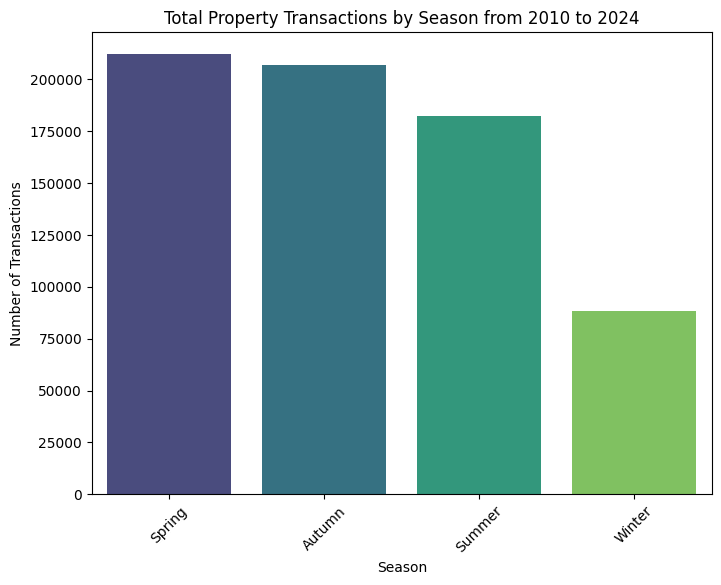

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

min_year = df['Year'].min()
max_year = df['Year'].max()


# Group by 'Season' and count transactions
season_transaction_counts_season = df.groupby('Season').size().reset_index(name='Total Transactions')

# Sort by total transactions (optional for ordering in the chart)
season_transaction_counts_season = season_transaction_counts_season.sort_values(by='Total Transactions', ascending=False)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='Total Transactions', data=season_transaction_counts_season, palette="viridis")

# Adding titles and labels
plt.title(f'Total Property Transactions by Season from {min_year} to {max_year}')
plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


In [25]:
season_transaction_counts_season

,Season,Total Transactions
1,Spring,212087
0,Autumn,207008
2,Summer,182098
3,Winter,88363


C:\Users\edson\AppData\Local\Temp\ipykernel_14088\2452911251.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total Transactions', data=season_transaction_counts, palette="viridis")


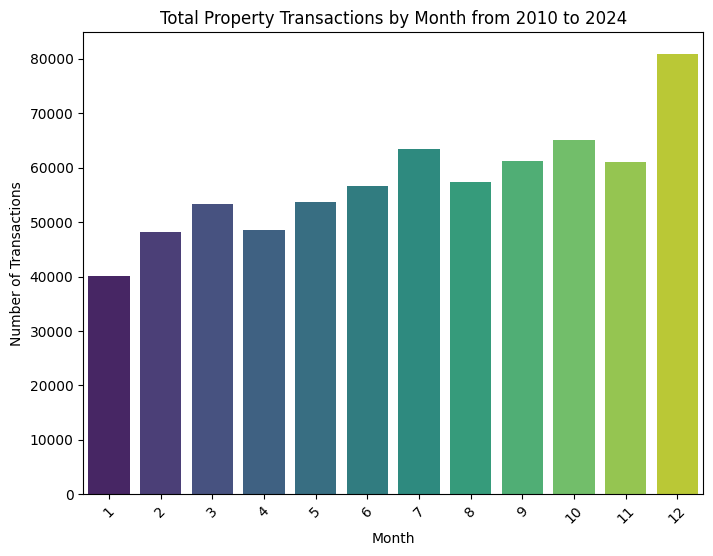

In [26]:
# Group by 'Month' and count transactions
season_transaction_counts = df.groupby('Month').size().reset_index(name='Total Transactions')

min_year = df['Year'].min()
max_year = df['Year'].max()

# Sort by total transactions (optional for ordering in the chart)
season_transaction_counts = season_transaction_counts.sort_values(by='Total Transactions', ascending=False)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Total Transactions', data=season_transaction_counts, palette="viridis")

# Adding titles and labels
plt.title(f'Total Property Transactions by Month from {min_year} to {max_year}')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [27]:
season_transaction_counts

,Month,Total Transactions
11,12,80844
9,10,65169
6,7,63487
8,9,61273
10,11,60995
7,8,57338
5,6,56677
4,5,53662
2,3,53247
3,4,48501


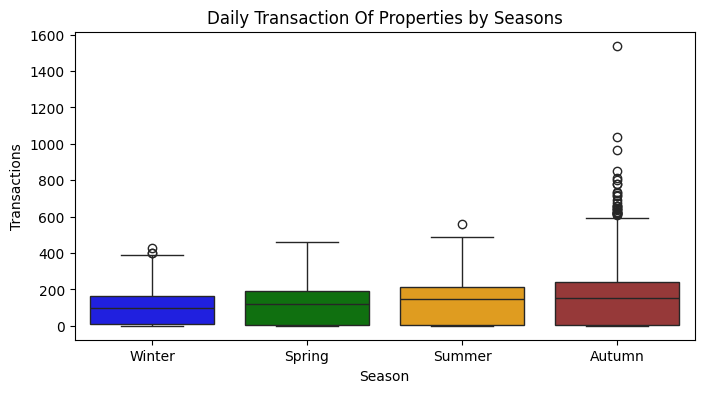

In [28]:

plt.figure(figsize=(8,4))

df_grouped_by_season = df.groupby(['Date of Sale', 'Season']).size().reset_index(name='Transaction Count')

paleta_cores = {'Spring': 'green', 'Summer': 'orange', 'Autumn': 'brown' , 'Winter': 'blue'}
sns.boxplot(x='Season', y='Transaction Count', data=df_grouped_by_season, hue='Season', palette=paleta_cores)
plt.title('Daily Transaction Of Properties by Seasons')
plt.xlabel('Season')
plt.ylabel('Transactions')
plt.show()

In [29]:
df_grouped_by_season

,Date of Sale,Season,Transaction Count
0,2010-01-01,Winter,1
1,2010-01-03,Winter,1
2,2010-01-04,Winter,41
3,2010-01-05,Winter,32
4,2010-01-06,Winter,37
...,...,...,...
5121,2024-10-28,Autumn,1
5122,2024-10-29,Autumn,103
5123,2024-10-30,Autumn,115
5124,2024-10-31,Autumn,146


In [30]:
df_grouped_by_season.groupby('Season')['Transaction Count'].median()

Season
Autumn    153.0
Spring    123.0
Summer    146.0
Winter     98.0
Name: Transaction Count, dtype: float64

Formulating the hypotheses for Seasons :

Autumn has a higher number of transaction that summer.

$H_0:$ The distribution of transaction counts in autumn is less than or equal to that in summer.
$H_1:$ The distribution of transaction counts in autumn is greater than that in summer

> Você pode encontrar informações detalhadas sobre o *mannwhitneyu* da biblioteca scipy [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

In [31]:
from scipy.stats import mannwhitneyu

# Filtrando os dados da primavera e outono
summer = df_grouped_by_season[df_grouped_by_season['Season'] =='Summer']['Transaction Count']
autumn = df_grouped_by_season[df_grouped_by_season['Season'] =='Autumn']['Transaction Count']

# Aplicando o teste de Mann-Whitney
u_statistic, p_value = mannwhitneyu(autumn, summer, alternative='greater')
u_statistic, p_value

(np.float64(883636.5), np.float64(0.0020808109286271784))

In [32]:
if p_value < 0.05:
    conclusao = "Reject H0"
else:
    conclusao = "Don't reject H0"


print("Conclusão:", conclusao)

Conclusão: Reject H0




In the statement:

```python
mannwhitneyu(autumn, summer, alternative='greater')
```

- **Interpretation**: You are testing if **autumn** (the first element) has a distribution that is **greater** than **summer** (the second element).
- **Alternative Hypothesis ($H_1$)**: "The distribution of transaction counts in autumn is greater than in summer."

### Breakdown
- **First Element (autumn)**: This is the sample you're testing as being **greater**.
- **Second Element (summer)**: This is the comparison sample.
- **`alternative='greater'`**: Specifies that the test is one-sided, checking if the **first sample** is greater than the **second sample**.

So, in this setup, your **$H_1$** (alternative hypothesis) is:
> "Autumn has more transactions than summer."

And your **$H_0$** (null hypothesis) is:
> "Autumn does not have more transactions than summer" (i.e., autumn has less than or equal to the number of transactions as summer).

This configuration correctly aligns the hypothesis test with your research question.

Since you rejected $H_0$, you can conclude that:

Autumn has a significantly higher number of transactions than summer.

##**Aula 4: Analisando os dados ao longo do tempo**

###**Convertendo tipos de dados**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689556 entries, 0 to 690484
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               689556 non-null  datetime64[ns]
 1   Address                    689556 non-null  object        
 2   County                     689556 non-null  object        
 3   Eircode                    163068 non-null  object        
 4   Price in K                 689556 non-null  int64         
 5   Not Full Market Price      689556 non-null  object        
 6   VAT Exclusive              689556 non-null  object        
 7   Description of Property    689556 non-null  object        
 8   Property Size Description  52589 non-null   object        
 9   Season                     689556 non-null  object        
 10  Year                       689556 non-null  int32         
 11  Month                      689556 non-null  int32        

###**Analysing the houses transactions by day and month**

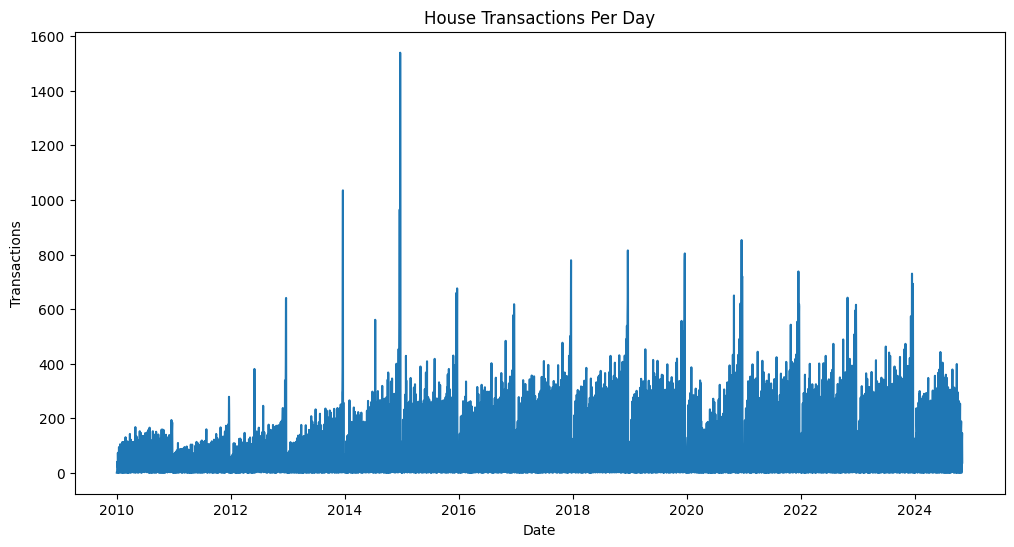

In [34]:
df_tempo = df.groupby('Date of Sale').size().reset_index(name='Transaction Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='Date of Sale', y='Transaction Count')
plt.title('House Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

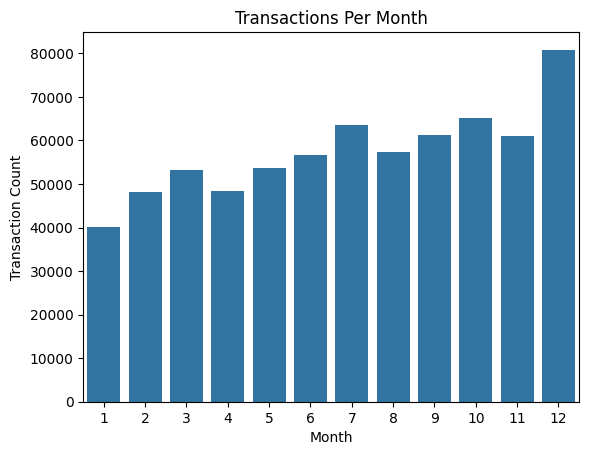

In [35]:
monthly_transaction = df.groupby('Month').size().reset_index(name='Transaction Count')

sns.barplot(data=monthly_transaction, x='Month', y='Transaction Count')
plt.title('Transactions Per Month')
plt.show()


## **Building the Predictive Model**

In [36]:
from prophet import Prophet

c:\Users\edson\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
## It's necessary to rename the column with dates and numbers we want to predict to 'ds' and 'y'

df_prophet = df.copy()
df_prophet['Count'] = 1
df_prophet = df_prophet[['Date of Sale', 'Count']].rename(columns={'Date of Sale': 'ds', 'Count': 'y'})
df_prophet.head()

,ds,y
0,2010-01-01,1
1,2010-01-03,1
2,2010-01-04,1
3,2010-01-04,1
4,2010-01-04,1


In [38]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2010-01-01,1
1,2010-01-03,1
2,2010-01-04,41
3,2010-01-05,32
4,2010-01-06,37
...,...,...
5121,2024-10-28,1
5122,2024-10-29,103
5123,2024-10-30,115
5124,2024-10-31,146


In [39]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5126 non-null   datetime64[ns]
 1   y       5126 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.2 KB


In [40]:

# Setting a seed to ensure reproducibility
import numpy as np
np.random.seed(4587)

# Instantiating the Prophet model
model = Prophet()

# Training the model
model.fit(df_prophet)

# Creating a dataframe for future predictions
future = model.make_future_dataframe(periods=12, freq='ME')

# Making the prediction
previsao = model.predict(future)




20:27:10 - cmdstanpy - INFO - Chain [1] start processing
20:27:11 - cmdstanpy - INFO - Chain [1] done processing


###**Explorando os resultados da previsão**

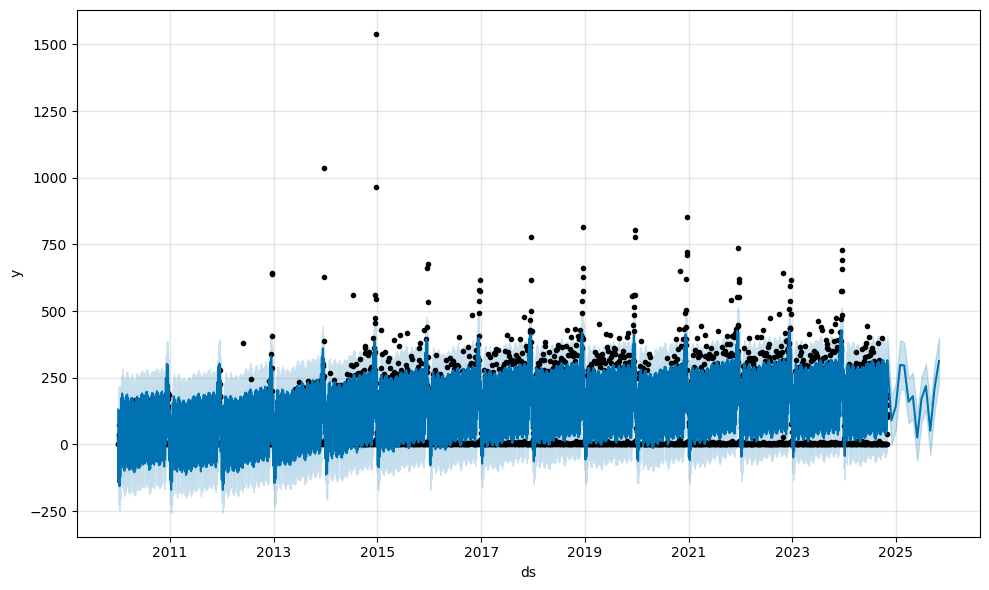

In [41]:
fig1 = model.plot(previsao)

In [42]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,130.670227,45.140381,218.160872
1,2010-01-03,-143.230004,-224.670281,-54.076026
2,2010-01-04,-13.059242,-98.293811,72.494511
3,2010-01-05,-1.059200,-84.041741,88.564065
4,2010-01-06,10.375525,-81.094461,100.086505
...,...,...,...,...
5133,2025-06-30,171.313581,82.151778,253.611152
5134,2025-07-31,219.105709,127.253441,303.983885
5135,2025-08-31,51.675382,-38.158961,147.150624
5136,2025-09-30,210.986297,122.835608,299.105314


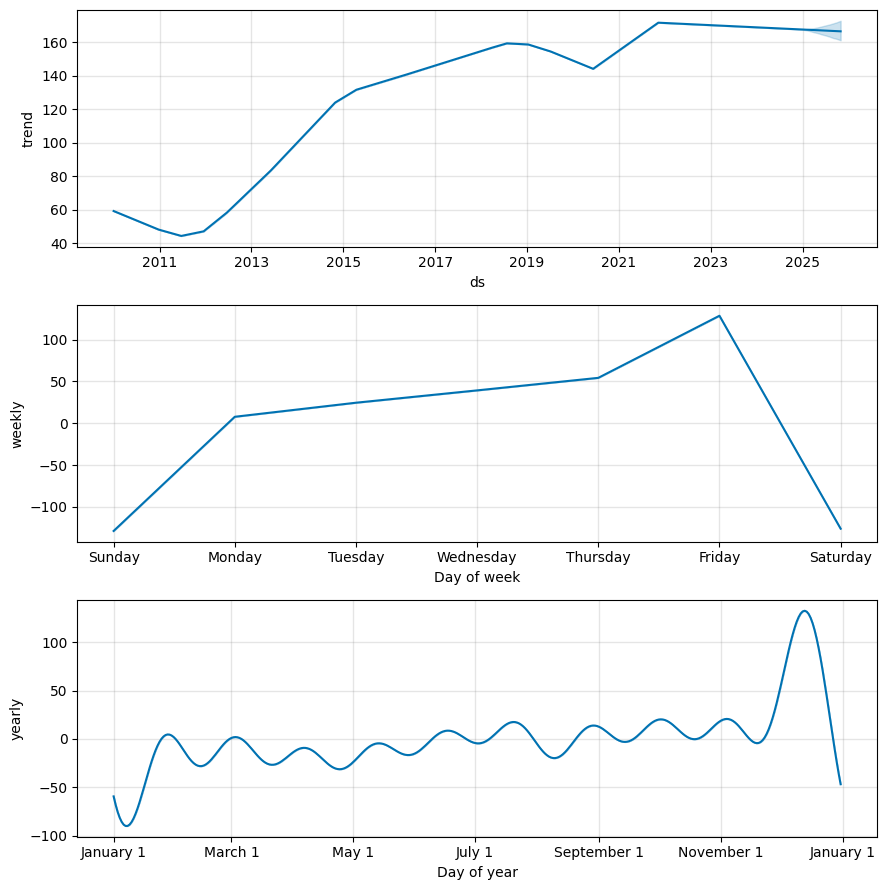

In [43]:
fig2 = model.plot_components(previsao)



The Prophet library uses an additive model that includes seasonal and trend components. The equation used by Prophet to make predictions can be represented as follows:


### **Splitting the Data into Training and Testing Sets**

Splitting data into training and testing sets is essential in time series models to evaluate the model’s ability to generalize. Imagine you are training a model to predict a company’s sales numbers. If you train the model with all available data and then test it with the same data, it may appear to perform well, but in practice, it could fail to predict future outcomes.

This happens because the model might simply memorize the specific patterns of the training data without actually learning to identify general patterns that apply to new data. By splitting the data into training and testing sets, you simulate a future forecasting scenario, ensuring that the model is evaluated based on its ability to generalize, i.e., its ability to make accurate predictions on data it has never seen before. This helps ensure that the model is robust and reliable when used for real-world predictions.

In [44]:
df_prophet.shape

(5126, 2)

In [45]:
df_treino = pd.DataFrame()


# 80% of data to training
df_treino['ds'] = df_prophet['ds'][:4100] #
df_treino['y'] = df_prophet['y'][:4100]

In [46]:
df_treino.shape

(4100, 2)

In [47]:
df_teste = pd.DataFrame()

# 20% of data to test
df_teste['ds'] = df_prophet['ds'][4100:]
df_teste['y'] = df_prophet['y'][4100:]

In [48]:
df_teste.shape

(1026, 2)

In [82]:
np.random.seed(4587)

# Instantiate and fit the model with logistic growth to enable cap and floor

df_treino['cap'] = df_treino['y'].max()  # Set the maximum cap to the highest value in your data
df_treino['floor'] = 1  # Set the minimum floor to 1

model = Prophet(growth='logistic')
model.fit(df_treino)
future = model.make_future_dataframe(periods=40, freq='ME')
future['cap'] = df_treino['y'].max()  # Set the cap to the same maximum as in the training data
future['floor'] = 1  # Set the floor to 1
prediction = model.predict(future)

20:51:43 - cmdstanpy - INFO - Chain [1] start processing
20:51:44 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
prediction

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,42.582520,1539,1,32.693753,211.560391,42.582520,42.582520,78.467499,78.467499,...,123.514502,123.514502,123.514502,-45.047003,-45.047003,-45.047003,0.0,0.0,0.0,121.050019
1,2010-01-03,42.631732,1539,1,-231.070856,-55.900220,42.631732,42.631732,-180.270545,-180.270545,...,-118.316384,-118.316384,-118.316384,-61.954161,-61.954161,-61.954161,0.0,0.0,0.0,-137.638813
2,2010-01-04,42.656359,1539,1,-106.183949,67.180518,42.656359,42.656359,-61.595799,-61.595799,...,6.929163,6.929163,6.929163,-68.524963,-68.524963,-68.524963,0.0,0.0,0.0,-18.939440
3,2010-01-05,42.681000,1539,1,-103.456567,74.028208,42.681000,42.681000,-52.866115,-52.866115,...,20.878118,20.878118,20.878118,-73.744234,-73.744234,-73.744234,0.0,0.0,0.0,-10.185115
4,2010-01-06,42.705656,1539,1,-93.334860,85.630581,42.705656,42.705656,-43.413375,-43.413375,...,34.162107,34.162107,34.162107,-77.575483,-77.575483,-77.575483,0.0,0.0,0.0,-0.707719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2024-10-31,170.173935,1539,1,159.030357,319.100247,161.354382,178.774093,69.064053,69.064053,...,48.477360,48.477360,48.477360,20.586693,20.586693,20.586693,0.0,0.0,0.0,239.237988
4136,2024-11-30,170.406113,1539,1,1.988521,187.353981,160.993957,179.419121,-75.801892,-75.801892,...,-115.644867,-115.644867,-115.644867,39.842975,39.842975,39.842975,0.0,0.0,0.0,94.604221
4137,2024-12-31,170.646323,1539,1,70.153466,238.338779,160.845333,180.039810,-16.669215,-16.669215,...,20.878118,20.878118,20.878118,-37.547334,-37.547334,-37.547334,0.0,0.0,0.0,153.977108
4138,2025-01-31,170.886832,1539,1,208.209311,382.937514,160.597960,180.708423,128.303163,128.303163,...,123.514502,123.514502,123.514502,4.788661,4.788661,4.788661,0.0,0.0,0.0,299.189995


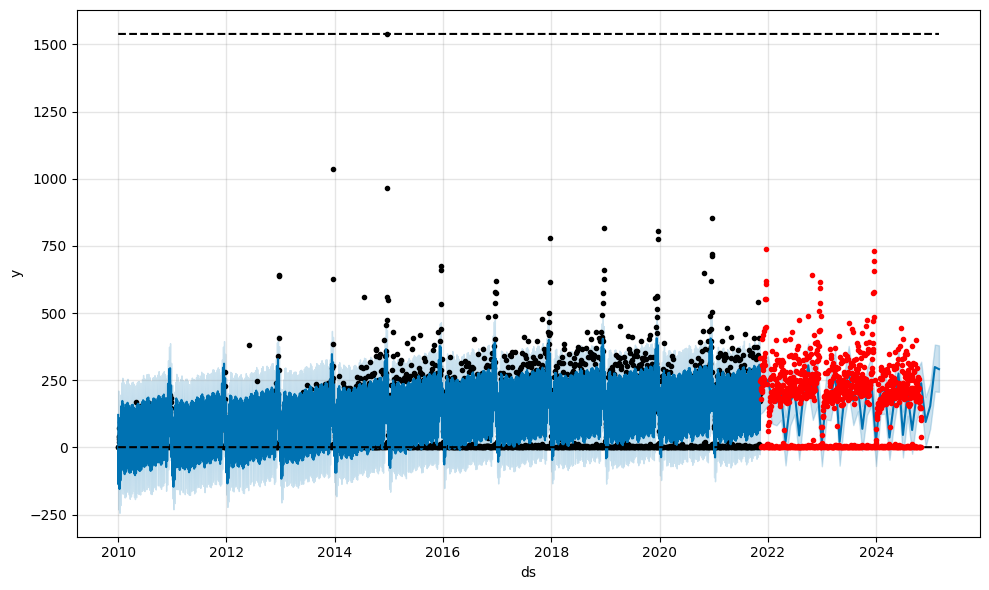

In [84]:
fig1 = model.plot(prediction)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

## Comparing the test dashboard with the prediction

The `'.r'` argument in `plt.plot()` is a shorthand notation for specifying the **style** of the plot:

- `.`: Indicates that the data points should be displayed as **dots**.
- `r`: Specifies the **color red**.

So, `'.r'` means **red dots**.

### Full Code Explanation
In your example:
```python
plt.plot(df_teste['ds'], df_teste['y'], '.r')
```

- `df_teste['ds']` is the x-axis data.
- `df_teste['y']` is the y-axis data.
- `'.r'` makes each data point a red dot on the plot.

### Examples of Other Shorthand Styles
You can use other shorthand notations like:
- `'-'`: Solid line
- `'--'`: Dashed line
- `'o'`: Circular markers
- `'g'`: Green color
- `'b'`: Blue color

For example:
```python
plt.plot(x, y, 'og')  # Green circles
plt.plot(x, y, '--b') # Blue dashed line
```

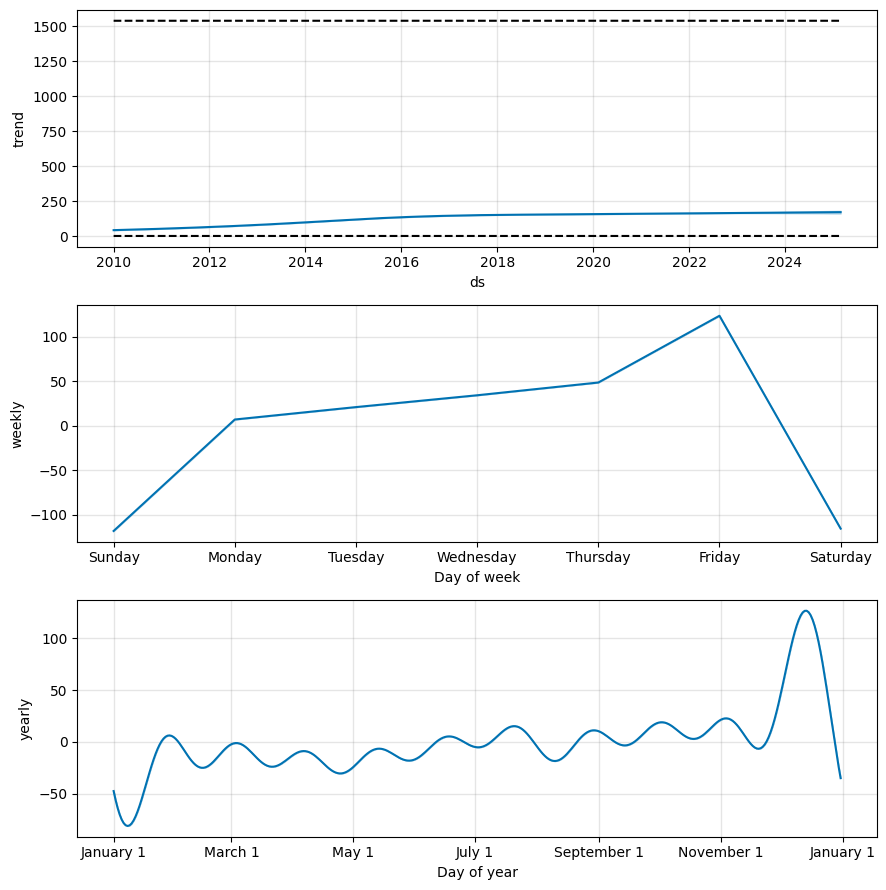

In [85]:
fig2 = model.plot_components(prediction)

Obtaining Metrics

In [86]:
df_prediction = prediction[['ds', 'yhat']]
df_comparison = pd.merge(df_prediction, df_teste, on='ds')
df_comparison

,ds,yhat,y
0,2021-11-30,220.737371,264
1,2021-12-31,250.924390,11
2,2022-01-31,174.608153,233
3,2022-02-28,166.151679,400
4,2022-03-31,197.340785,306
5,2022-04-30,21.374975,4
6,2022-05-31,166.781786,280
7,2022-06-30,207.952280,343
8,2022-07-31,44.358267,3
9,2022-08-31,209.321259,269




The MSE *(Mean Squared Error)* metric is a common performance evaluation measure for regression and forecasting models. It calculates the mean of the squared differences between the values predicted by the model and the actual values observed in the test data. Mathematically, MSE is calculated using the formula:

$$ MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n} $$

However, MSE has a limitation: its units are squared relative to the original units of the data. This can make it difficult to interpret its value.

To overcome this limitation, it is often preferable to use RMSE *(Root Mean Squared Error)*. The RMSE is simply the square root of the MSE and is calculated using the formula:

$$ RMSE = \sqrt{MSE} $$

In [89]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:12396.500626977338, RMSE:111.33957349917117


Improving Predictions

In [102]:
np.random.seed(4587)

model = Prophet(yearly_seasonality=True,growth='logistic')
df_prophet['cap'] = df_treino['y'].max()  # Set the maximum cap to the highest value in your data
df_prophet['floor'] = 1  # Set the minimum floor to 1
model.fit(df_treino)
future = model.make_future_dataframe(periods=35, freq='ME')
future['cap'] = df_treino['y'].max()  # Set the maximum cap to the highest value in your data
future['floor'] = 1  # Set the minimum floor to 1
prediction = model.predict(future)

21:00:25 - cmdstanpy - INFO - Chain [1] start processing
21:00:26 - cmdstanpy - INFO - Chain [1] done processing


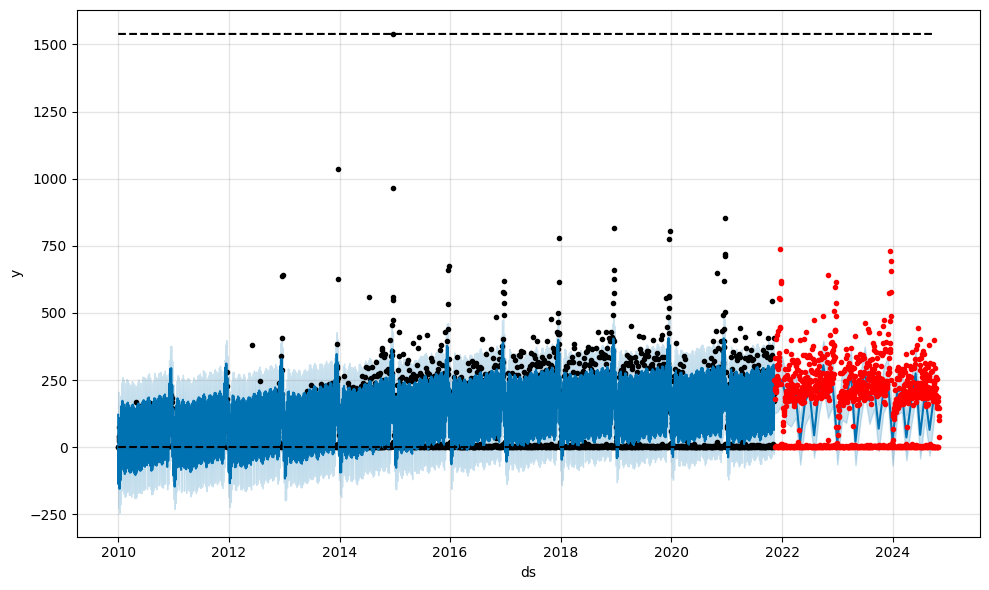

In [103]:
fig1 = model.plot(prediction)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

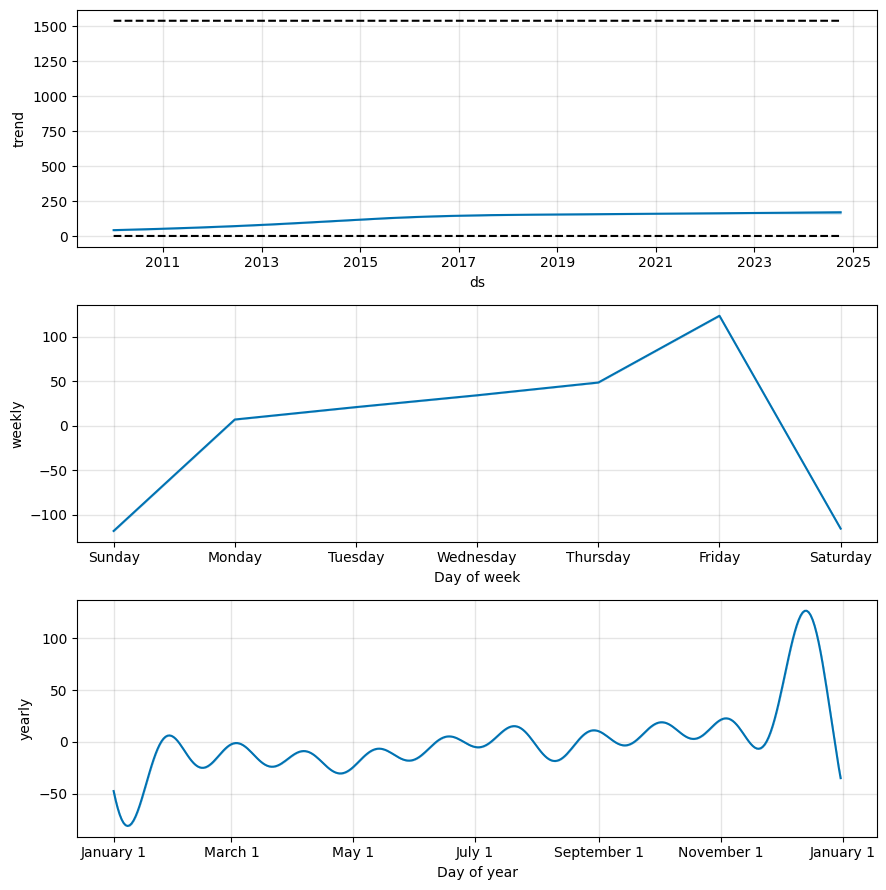

In [104]:
fig2 = model.plot_components(prediction)

In [105]:
df_prediction= prediction[['ds', 'yhat']]
df_comparison = pd.merge(df_prediction, df_teste, on='ds')
df_comparison

,ds,yhat,y
0,2021-11-30,220.737371,264
1,2021-12-31,250.924390,11
2,2022-01-31,174.608153,233
3,2022-02-28,166.151679,400
4,2022-03-31,197.340785,306
5,2022-04-30,21.374975,4
6,2022-05-31,166.781786,280
7,2022-06-30,207.952280,343
8,2022-07-31,44.358267,3
9,2022-08-31,209.321259,269


In [109]:
mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:12505.417632852852, RMSE:111.82762464101995


###**Handling Outliers**

In [110]:
df_prophet

,ds,y,cap,floor
0,2010-01-01,1,1539,1
1,2010-01-03,1,1539,1
2,2010-01-04,41,1539,1
3,2010-01-05,32,1539,1
4,2010-01-06,37,1539,1
...,...,...,...,...
5121,2024-10-28,1,1539,1
5122,2024-10-29,103,1539,1
5123,2024-10-30,115,1539,1
5124,2024-10-31,146,1539,1


In [111]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

21:02:51 - cmdstanpy - INFO - Chain [1] start processing
21:02:52 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [114]:
sem_outliers['cap'] = sem_outliers['y'].max()

C:\Users\edson\AppData\Local\Temp\ipykernel_14088\3582864000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_outliers['cap'] = sem_outliers['y'].max()


In [ ]:
sem_outliers

,ds,y,cap,floor
2,2010-01-04,41,454,1
3,2010-01-05,32,454,1
4,2010-01-06,37,454,1
5,2010-01-07,22,454,1
6,2010-01-08,74,454,1
...,...,...,...,...
5115,2024-10-21,147,454,1
5116,2024-10-22,152,454,1
5117,2024-10-23,149,454,1
5118,2024-10-24,173,454,1


In [118]:
df_treino = pd.DataFrame()

# Separando 80% dos dados para treino
df_treino['ds'] = sem_outliers['ds'][:3638]
df_treino['y'] = sem_outliers['y'][:3638]

In [117]:
df_teste = pd.DataFrame()

# Separando 20% dos dados para teste
df_teste['ds'] = sem_outliers['ds'][3638:]
df_teste['y'] = sem_outliers['y'][3638:]

###**Training without outliers**

In [125]:
np.random.seed(4587)

df_treino['cap'] = df_treino['y'].max()
df_treino['floor'] = 1

modelo_sem_outliers = Prophet(yearly_seasonality=True,growth='logistic')
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=35, freq='ME')
futuro['cap'] = df_treino['y'].max()
futuro['floor'] =1 
previsao = modelo_sem_outliers.predict(futuro)

21:10:33 - cmdstanpy - INFO - Chain [1] start processing
21:10:35 - cmdstanpy - INFO - Chain [1] done processing


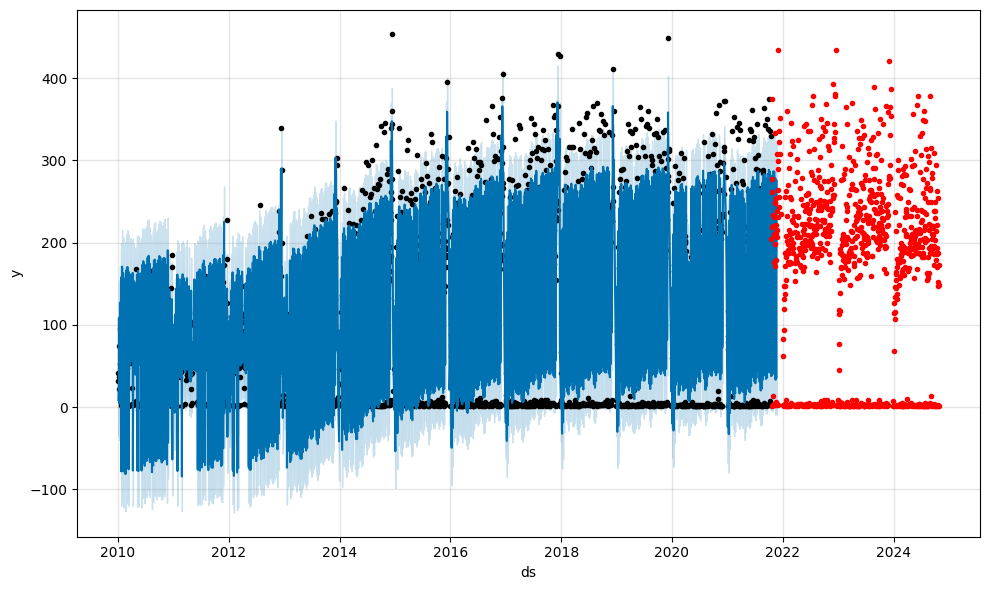

In [121]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [126]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2021-10-31,47.907297,13
1,2021-11-30,221.530578,264
2,2022-01-31,163.827386,233
3,2022-04-30,16.385188,4
4,2022-07-31,36.044591,3
5,2022-08-31,194.877906,269
6,2022-12-31,4.415928,4
7,2023-01-31,169.039527,211
8,2023-03-31,268.438513,370
9,2023-07-31,170.974052,257


In [127]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 4083.85601669096, RMSE: 63.90505470376315
